<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Customer_Segmentation_%26_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

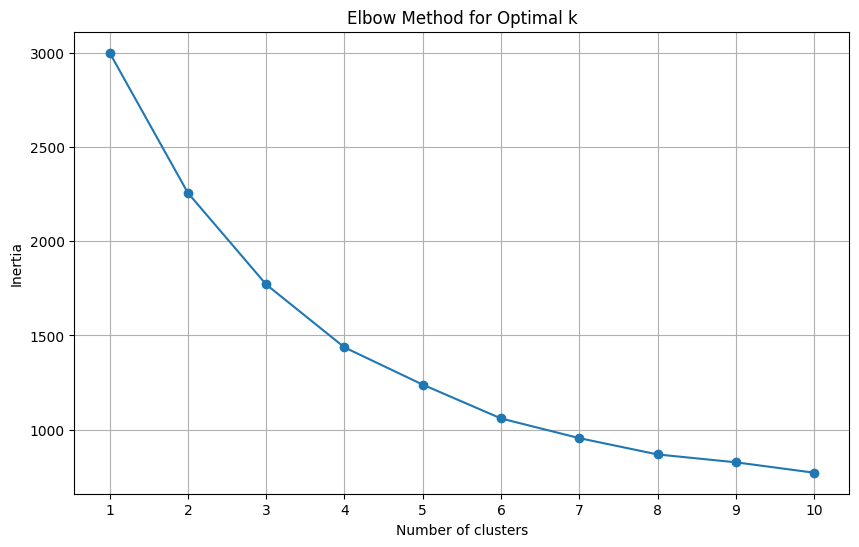

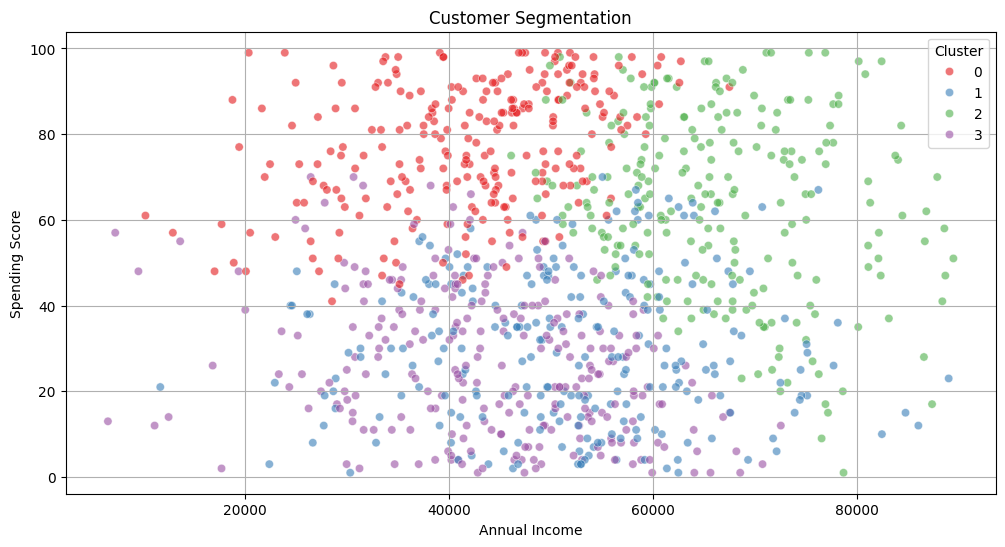

Customer Segmentation Profiles:
   Cluster        Age  Annual_Income  Spending_Score  Customer_Count
0        0  39.040000   41878.669334       77.460000             266
1        1  27.995935   51925.748091       30.288618             250
2        2  51.420168   66576.373158       63.882353             246
3        3  56.142857   44267.083191       26.736842             238


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Simulate Customer Data
np.random.seed(42)  # For reproducibility

# Generate synthetic data for customer segmentation
num_customers = 1000
age = np.random.randint(18, 70, size=num_customers)  # Age between 18 and 70
annual_income = np.random.normal(50000, 15000, size=num_customers)  # Average income with some variance
spending_score = np.random.randint(1, 100, size=num_customers)  # Spending score from 1 to 100

# Create a DataFrame
customer_data = pd.DataFrame({
    'Age': age,
    'Annual_Income': annual_income,
    'Spending_Score': spending_score
})

# Step 2: Data Preprocessing
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Step 3: Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (let's assume k=4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Profile Each Customer Segment
# Calculate mean values for each segment
segment_profile = customer_data.groupby('Cluster').mean().reset_index()

# Add a count of customers in each segment
segment_profile['Customer_Count'] = customer_data['Cluster'].value_counts().values

# Step 5: Visualize Customer Segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 6: Display Segment Profiles
print("Customer Segmentation Profiles:")
print(segment_profile)
